In [15]:
#chapter4, training models
import numpy as np
import matplotlib.pyplot as plt

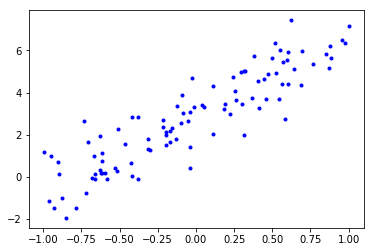

In [16]:
x = 2*(np.random.rand(100, 1)-0.5)
y = 3 + 4*x + np.random.randn(100, 1)
plt.plot(x, y, 'b.')
plt.show()

[[ 2.92459852]
 [ 3.63878775]]


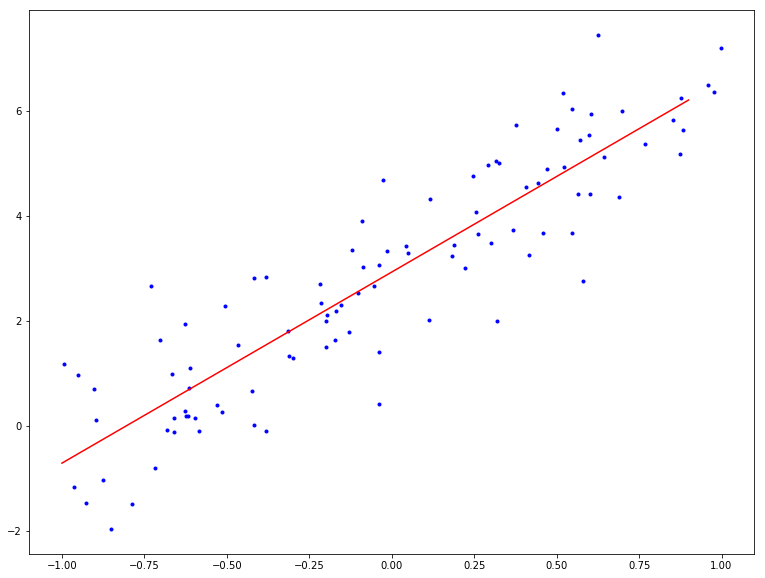

In [17]:
#for stochastic gradient descent
n_epochs = 50
order = 2
t0,t1 = 5, 50
m = len(x)
x_b = np.c_[np.ones((m, 1)), x]

def learning_schedule(t):
    return t0/(t+t1)
    
theta = np.random.randn(order, 1)

for ep in range(n_epochs):
    for i in range(m):
        ind = np.random.randint(m)
        xi = x_b[ind:ind+1]
        yi = y[ind:ind+1]
        gr = xi.T*(xi.dot(theta) - yi)
        stepsz = learning_schedule(ep*m+i)
        theta = theta - (stepsz*gr)
        
print(theta)
xt = np.arange(-1, 1, 0.1)
xt_b = np.c_[np.ones((len(xt), 1)), xt.reshape(len(xt), -1)]

plt.figure(figsize = (13,10))
plt.plot(x, y, 'b.')
plt.plot(xt, xt_b.dot(theta), 'r-')
plt.show()

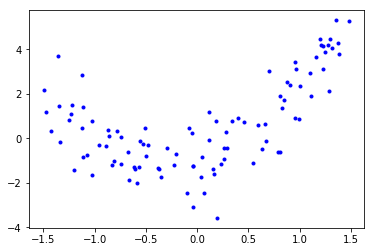

In [18]:
#polynomial reg
m = 100
x = 3*(np.random.rand(m, 1) - 0.5)
y = 2*x**2 + 1.2*x - 1 + np.random.randn(m, 1)
plt.plot(x, y, 'b.')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feat = PolynomialFeatures(degree = 10, include_bias = False)
x_poly = poly_feat.fit_transform(x.reshape(len(x), -1))
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

xt = np.arange(-1.5, 1.5, 0.1)
xt_poly = poly_feat.fit_transform(xt.reshape(len(xt), -1))
#yt = poly_reg.intercept_ + poly_reg.coef_[0, 0]*xt + poly_reg.coef_[0, 1]*xt**2
yt = poly_reg.intercept_ + xt_poly.dot(poly_reg.coef_[0])
plt.plot(x, y, 'b.')
plt.plot(xt, yt, 'r-')
plt.show()

In [33]:
print(poly_reg.coef_)

[[ 1.05664564  2.08905759  0.06864336]]


In [5]:
x_b[ind:ind+1]

array([[ 1.        , -0.75491882]])

In [6]:
x_b[ind]

array([ 1.        , -0.75491882])